## 02. Neural network classification with PyToch

Classification is a prolem of predicting one thing or the other.

### 1. Make classifcation data and get it ready

In [1]:
import sklearn
import torch
from torch import nn
torch.__version__
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
RANDOM_STATE = 1
torch.manual_seed(RANDOM_STATE)

In [3]:
from sklearn.datasets import make_circles

#make 1000 circles
n_samples =1000
#create

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
X.shape,y.shape

((1000, 2), (1000,))

In [6]:
print(f"first five samples of X{X[:5]}")
print(f"first 5 samples of y{y[:5]}")

first five samples of X[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y[1 1 1 1 0]


In [7]:
#make a dataframe
import pandas as pd

circles = pd.DataFrame({"X1": X[: ,0],
                        "X2": X[:,1],
                        'label':y})

In [8]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [9]:
#visualizing

import matplotlib.pyplot as plt

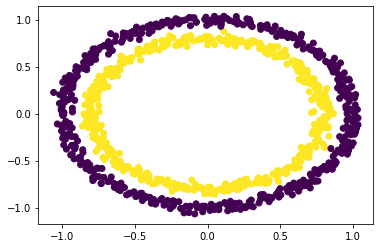

In [10]:
plt.scatter(x=X[:,0],
             y=X[:,1],
             c=y,
)

In [11]:
X.shape


(1000, 2)

In [12]:
y.shape

(1000,)

### Check input and output shapes

In [13]:
X.shape, y.shape

((1000, 2), (1000,))

In [14]:
print(f'The first element in X:{X[0]}')
print(f'The first element in y:{y[0]}')

The first element in X:[0.75424625 0.23148074]
The first element in y:1


In [15]:
#convert to tensor
X_tensor = torch.tensor(X,dtype=torch.float)   
# or X_tensor = torch.from_numpy(X).type(torch.float)

In [16]:
y_tensor = torch.from_numpy(y).type(torch.float)


In [17]:
X_tensor.dtype, y_tensor.dtype

(torch.float32, torch.float32)

### Splitting into train and test set

In [18]:
train_index = int(len(X_tensor)*0.8)

In [19]:
# X_train = X_tensor[:train_index]
# X_test = X_tensor[:train_index]

# #split y-labels into train and test

# y_train = y_tensor[:train_index]
# y_test = y_tensor[train_index:]

# we will need to split the data randomly
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size=0.2,
                                                    random_state=RANDOM_STATE)

In [20]:

print(f"shape of X train and test  is:{X_train.shape}{X_test.shape},shape of y_train and y test is:{y_train.shape}{y_test.shape}") 

shape of X train and test  is:torch.Size([800, 2])torch.Size([200, 2]),shape of y_train and y test is:torch.Size([800])torch.Size([200])


###  Setting device agnostic code

In [21]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [22]:
X_train

tensor([[-0.7669, -0.4010],
        [ 0.6442,  0.8450],
        [-0.0486, -0.7862],
        ...,
        [-0.6944,  0.4694],
        [ 0.8941,  0.3639],
        [ 0.4476,  0.7139]])

### Building a model

1. subclass nn.Module
2. create 2 nn.Linear() layers
3. define a forward method
4. intantiate

In [23]:
#defining class that inheritss nn.Module

class CircleModelV0(nn.Module):
  #create a constructor
  #The code def __init__(self): defines a special method in Python known as the constructor method. 
  #The constructor method is used to initialize an object of a class and is called automatically when a new object is created from the class.
  def __init__(self):
    super().__init__()     
    #create 2 nn.Liear() layers- the linear layers perfrom linear transformation on the data input
    
    self.layer_1 = nn.Linear(in_features = 2,
                       out_features = 5)   #x has 2 features, ex:[[.343,.4343]]
    
    self.layer_2 = nn.Linear(in_features = 5,
                             out_features = 1 )   # out_features of previous layer into in_features of this layer
    
    #define a forward method - forward method is the process of transforming input data to output predictions
    #Given an input x, the forward function applies the first linear layer layer_1 to x by calling self.layer_1(x). 
    #This computes the linear transformation defined by layer_1, and returns the result.
    # The result is then passed as input to the second linear layer layer_2 by calling self.layer_2(self.layer_1(x)).
    # This computes the final linear transformation and produces the final output of the forward pass, which is returned by the function.
  def forward(self,x):
      return self.layer_2(self.layer_1(x))
      


model_0 = CircleModelV0().to(device)


In [24]:
next(model_0.parameters()).device

device(type='cpu')

### Replicating code using nn.Sequential


In [25]:
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)).to(device)

In [26]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.4271, -0.1185],
                      [-0.3050, -0.2266],
                      [ 0.0339,  0.4215],
                      [ 0.3843, -0.6912],
                      [ 0.4383,  0.1975]])),
             ('0.bias', tensor([ 0.6707,  0.4667, -0.6443, -0.6723, -0.3411])),
             ('1.weight',
              tensor([[ 0.3927, -0.0745,  0.1914, -0.2078,  0.4388]])),
             ('1.bias', tensor([-0.1892]))])

### Making predictons

In [28]:
with torch.inference_mode():
  untrained_predictions = model_0(X_test.to(device))

In [29]:
untrained_predictions

tensor([[-0.3835],
        [ 0.1584],
        [-0.3865],
        [-0.3885],
        [-0.0683],
        [-0.3182],
        [ 0.1491],
        [-0.0095],
        [-0.0070],
        [-0.2852],
        [ 0.1301],
        [ 0.0186],
        [ 0.1780],
        [-0.3505],
        [ 0.1048],
        [-0.1268],
        [ 0.1265],
        [ 0.1325],
        [-0.0677],
        [-0.2920],
        [-0.3235],
        [-0.2863],
        [ 0.0633],
        [-0.3824],
        [-0.2630],
        [-0.2189],
        [ 0.1589],
        [-0.2964],
        [ 0.1484],
        [-0.0940],
        [-0.2602],
        [ 0.1241],
        [ 0.0383],
        [-0.3320],
        [ 0.1212],
        [-0.0404],
        [ 0.1157],
        [ 0.0960],
        [-0.3660],
        [ 0.0081],
        [-0.1726],
        [ 0.0635],
        [-0.3719],
        [-0.3589],
        [-0.1692],
        [-0.2320],
        [ 0.1180],
        [ 0.1605],
        [ 0.1737],
        [ 0.1654],
        [-0.2356],
        [-0.3919],
        [-0.

In [30]:
#checking shape

print(f'The length of predictions is: {len(untrained_predictions)},shape:{untrained_predictions.shape}')
print(f'The length of test is: {len(X_test)},shape:{untrained_predictions.shape}')
print(f'The length of test labels is {len(y_test)}, shape:{untrained_predictions.shape}')
print(f'First 10 predictions: {untrained_predictions[:10]}')

The length of predictions is: 200,shape:torch.Size([200, 1])
The length of test is: 200,shape:torch.Size([200, 1])
The length of test labels is 200, shape:torch.Size([200, 1])
First 10 predictions: tensor([[-0.3835],
        [ 0.1584],
        [-0.3865],
        [-0.3885],
        [-0.0683],
        [-0.3182],
        [ 0.1491],
        [-0.0095],
        [-0.0070],
        [-0.2852]])


### Loss function
Loss functions shows how different out predictions are from the actual values
Binary cross entropy  
Categorical cross entropy

In [31]:
#sigmoid activation function uilt in
loss_fn = torch.nn.BCEWithLogitsLoss()

### Accuracy with classification

In [32]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_true.to(device),y_pred.to(device)).sum().item()
  accu = correct/len(y_true)*100
  return accu


### Optimizer
optimizes the loss function such that losses go down


In [33]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

### Training and testing the model
## Training

1. set epochs
2. set up train mode
43. perform a forward pass
44. calculate loss
5. reset optimzer zero - zero_grad
6. backward propagation
7. optimize the loss - perform optimizer step

## Testing
1. instantiate the model
2. fit the train set
3. calulate the accuracy


In [34]:

torch.manual_seed(42)

#putting to device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
y_train =y_train.to(device)

#set up epochs - 
epochs = 100


#training loop 
for epoch in range(epochs):
  #train mode
  model_0.train()

  #1. forwad pass
  y_logits = model_0(X_train).squeeze() #BCE with logits which is our loss fucnion require logits
  #logit -->probability --> 1s and 0s #forward pass returns logit, 
  #logit will be sent to sigmoid activation
  #which will return probabilty
  #we will will round the probability to get out 1s and 0s
  y_preds = torch.round(torch.sigmoid(y_logits)) 
  

  #2.calculate loss
  train_loss = loss_fn(y_logits,y_train)

  #calulate accuracy
  train_accuracy = accuracy_fn(y_pred = y_preds, y_true= y_train)

  #3.reset the optimizer
  optimizer.zero_grad

  #4.perform back propagation
  train_loss.backward()

  #5. perform optimizer step(gradient descent )
  optimizer.step()

  #testing
  #set to evaluation mode
  model_0.eval()
  with torch.inference_mode():
    #1.Forward pass
    test_preds_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_preds_logits))
    
    #2.Loss
    test_loss = loss_fn(test_preds_logits, y_test)

    test_accuracy = accuracy_fn(test_preds, y_test)

  #printing
  if epoch%10 == 0:
    print(f"The train set:  accuracy: {train_accuracy:.2f},   |   train loss{train_loss:.2f}")
    print(f"The test set:   accuracy:{train_accuracy:.2f},    |   test loss {train_loss:.2f}")
 


The train set:  accuracy: 48.50,   |   train loss0.70
The test set:   accuracy:48.50,    |   test loss 0.70
The train set:  accuracy: 48.75,   |   train loss0.70
The test set:   accuracy:48.75,    |   test loss 0.70
The train set:  accuracy: 50.25,   |   train loss0.70
The test set:   accuracy:50.25,    |   test loss 0.70
The train set:  accuracy: 52.12,   |   train loss0.70
The test set:   accuracy:52.12,    |   test loss 0.70
The train set:  accuracy: 49.75,   |   train loss0.69
The test set:   accuracy:49.75,    |   test loss 0.69
The train set:  accuracy: 51.12,   |   train loss0.69
The test set:   accuracy:51.12,    |   test loss 0.69
The train set:  accuracy: 48.12,   |   train loss0.69
The test set:   accuracy:48.12,    |   test loss 0.69
The train set:  accuracy: 48.25,   |   train loss0.70
The test set:   accuracy:48.25,    |   test loss 0.70
The train set:  accuracy: 49.50,   |   train loss0.70
The test set:   accuracy:49.50,    |   test loss 0.70
The train set:  accuracy: 50

### Going from raw logits --> prediction probabilities --> prediction labels

-Models output are raw **logits**  


-Convert **logits** into prediction probabilites by passing them to  some kind of activation function(e.g. sigmoid for binary classiifcication and softmax for multilclass classification).  

-Convert  model's prediction probabilities to **prediction labels** by either rounding them or taking








### Visualisation
#### Helper functions form git hub repo
Using heper functions from github respository to make decision boundary
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

We will see the plot predictions of our model


In [35]:
import requests  #send requets to web and retrieve response
from pathlib import Path

# download helper function from git hub repo if not alread downloaded
if Path('Helper_functions.py').is_file():
  print('Helper function already downloaded')

else:
  print("Downloading helper function")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')  #get the raw formal url of the git hub page

  with open('helper_functions.py','wb') as f:   #write binary-ab, writing file short version as f
  #name file as f
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


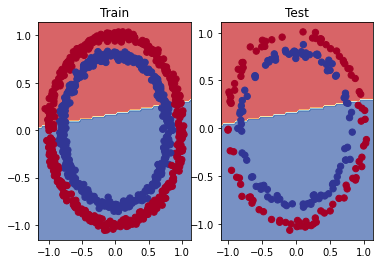

In [36]:
# plot the decision boundary

plt.subplot(1,2,1)
plt.figsize=(12,6)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1,2,2)
plt.figsize=(12,6)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)



Data is being separated by a straight line, therefore so low accuracy

### 5. Improving the model

- Adding more layers
- Adding more hidden layers
- Change the activation function-
- Fitting for longer , more epochs
- Changing learning rate


#### Experiment 1: increasing the hidden layers
1- Improve mode by increasing hidden layers to 10, visile layer to 3
2- 


In [37]:
# t 
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features=10, out_features =10)
    self.layer_3 = nn.Linear(in_features= 10, out_features= 1)


  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)


In [38]:
CircleModelV1()

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
#Create a loss function

loss_fn = nn.BCEWithLogitsLoss()


# Instantiate an optimizer

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)


# Training and test fucntions

X_train, X_test = X_train.to(device), X_test.to(device)

y_train, y_test = y_train.to(device), y_test.to(device) 

epochs = 1000 

for epoch in range(epochs):
  model_1.train()
   
  #1.forward pass
  y_logit = (model_1(X_train)).squeeze()   #getting ouput logits and then removing one dimension
  train_pred = torch.round(torch.sigmoid(y_logits))     #applying sigmoid activation and then rounding up

  #2. calculate loss
  logit_loss = loss_fn(y_logit, y_train)
  acc = accuracy_fn(train_pred, y_train)

  optimizer.zero_grad()

  #bac propagation
  logit_loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_test, test_pred)

  if epoch%100 == 0:
    print(f"Epch: {epoch} | Loss:{logit_loss:.2f} , Accuracy:{acc:.2f}|test loss:{test_loss:.5f}, test acc{test_acc:.2f}")




Epch: 0 | Loss:0.69 , Accuracy:51.38|test loss:0.69285, test acc52.50
Epch: 100 | Loss:0.69 , Accuracy:51.38|test loss:0.69303, test acc49.50
Epch: 200 | Loss:0.69 , Accuracy:51.38|test loss:0.69320, test acc46.50
Epch: 300 | Loss:0.69 , Accuracy:51.38|test loss:0.69333, test acc45.00
Epch: 400 | Loss:0.69 , Accuracy:51.38|test loss:0.69344, test acc45.00
Epch: 500 | Loss:0.69 , Accuracy:51.38|test loss:0.69354, test acc45.00
Epch: 600 | Loss:0.69 , Accuracy:51.38|test loss:0.69363, test acc47.00
Epch: 700 | Loss:0.69 , Accuracy:51.38|test loss:0.69371, test acc47.50
Epch: 800 | Loss:0.69 , Accuracy:51.38|test loss:0.69378, test acc50.50
Epch: 900 | Loss:0.69 , Accuracy:51.38|test loss:0.69384, test acc49.00


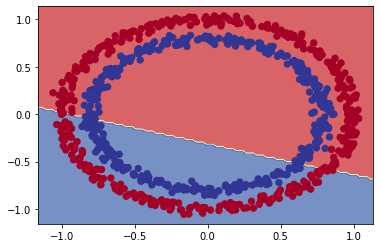

In [40]:
plot_decision_boundary(model_1, X_train, y_train)

### Creating a linear data to fit in our model and check its performance

In [41]:
bias = 0.3
weight = 0.7 

x = torch.arange(0,1,0.01)

X = x.unsqueeze(dim=1)

y = bias*X + bias



In [42]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

#### Train test split



In [43]:
trainindex = int(len(X)*0.8)

X_train_regression = X[:trainindex]
X_test_regression = X[trainindex:]

y_train_regression = y[:trainindex]
y_test_regression = y[trainindex:]

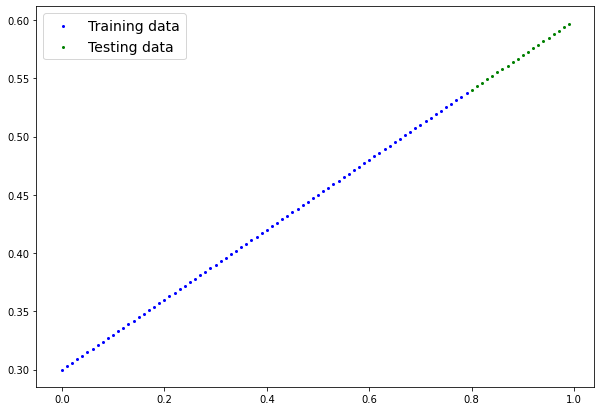

In [44]:
plot_predictions(X_train_regression,y_train_regression,X_test_regression,y_test_regression)

#### Model

In [45]:
model_2 = nn.Sequential(nn.Linear(in_features = 1, out_features = 10),
                        nn.Linear(in_features =10, out_features = 10),
                        nn.Linear(in_features = 10, out_features =1)).to(device)

In [46]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [47]:
if torch.cuda.is_available():
  device = 'cuda'

else:
  device = 'cpu'

In [48]:
## 

epochs =1000

# put data on target device

X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)

y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)


for epoch in range(epochs):
  

  #1.Forward pass

  y_pred = model_2(X_train_regression)

  #2.Loss

  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #testing

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test)


  if epoch%100 ==0:
    print(f"Epoch{epoch}  |  Train loss:{loss}  |  Test loss:{test_loss}")


  



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch0  |  Train loss:0.2605651915073395  |  Test loss:0.5085179805755615
Epoch100  |  Train loss:0.060895513743162155  |  Test loss:0.5016170144081116
Epoch200  |  Train loss:0.015000668354332447  |  Test loss:0.4993271827697754
Epoch300  |  Train loss:0.027926379814743996  |  Test loss:0.49868321418762207
Epoch400  |  Train loss:0.026382800191640854  |  Test loss:0.4986990690231323
Epoch500  |  Train loss:0.02404487505555153  |  Test loss:0.4986938536167145
Epoch600  |  Train loss:0.02307680994272232  |  Test loss:0.49871811270713806
Epoch700  |  Train loss:0.02129345014691353  |  Test loss:0.49872100353240967
Epoch800  |  Train loss:0.019792839884757996  |  Test loss:0.498711496591568
Epoch900  |  Train loss:0.019636139273643494  |  Test loss:0.49871766567230225


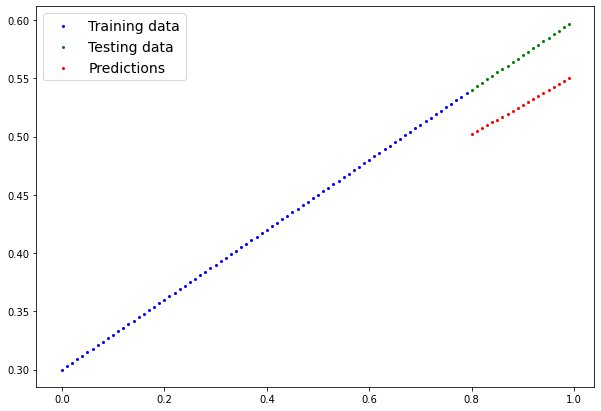

In [49]:
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

###  Non-linearity
Adding non linearity to our model, since our data points was of  circles and the model based on linear parameter could not predict well.


#### Creating the dataset
The dataset consists of 2d values, which represents the x and y coordinates of the point. 
y - repessents the class to which the point belong to.




In [50]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [51]:
X,y = make_circles(n_samples= 1000, random_state=RANDOM_STATE, noise = 0.03)

In [52]:
X.shape, y.shape

((1000, 2), (1000,))

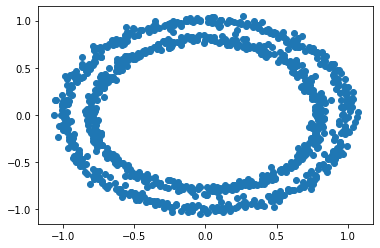

In [53]:
plt.scatter(x=X[:,0],y=X[:,1])

#### Split the dataset

In [54]:
# co
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [55]:
X_train.shape,X_test.shape

((750, 2), (250, 2))

In [56]:
y_train.shape, y_test.shape

((750,), (250,))

#### Convert to tensor

In [57]:
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test, dtype= torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [58]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([750, 2]),
 torch.Size([250, 2]),
 torch.Size([750]),
 torch.Size([250]))

#### Making a class model

In [59]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features = 2 , out_features= 10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function


  def forward(self,x):
    return(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))


model_3 = CircleModelV2().to(device)
model_3.parameters()




    

<generator object Module.parameters at 0x7f45b44f5270>

#### Optimizer and loss fucntion

In [60]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

In [61]:
X_train.shape

torch.Size([750, 2])

### Training and test set

In [62]:
torch.manual_seed(RANDOM_STATE)
torch.cuda.manual_seed(RANDOM_STATE)
epochs = 1000
#put data on  target device
X_train,X_test = X_train.to(device), X_test.to(device)

y_train,y_test = y_train.to(device), y_test.to(device)
for epoch in range(epochs):

  #train mode
  model_3.train()

  #forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #loss 
  loss= loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #test mode
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if epoch%100==0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f}  | Accuracy:{acc:.4f}%  | Test loss:{test_loss:.4f}  | Test accuracy:{test_acc:.4f}%")






Epoch:0 | Loss:0.6980  | Accuracy:50.1333%  | Test loss:0.6995  | Test accuracy:49.6000%
Epoch:100 | Loss:0.6905  | Accuracy:63.0667%  | Test loss:0.6903  | Test accuracy:64.0000%
Epoch:200 | Loss:0.6868  | Accuracy:59.4667%  | Test loss:0.6860  | Test accuracy:62.4000%
Epoch:300 | Loss:0.6824  | Accuracy:58.0000%  | Test loss:0.6816  | Test accuracy:59.2000%
Epoch:400 | Loss:0.6766  | Accuracy:58.1333%  | Test loss:0.6763  | Test accuracy:58.0000%
Epoch:500 | Loss:0.6700  | Accuracy:57.7333%  | Test loss:0.6703  | Test accuracy:58.0000%
Epoch:600 | Loss:0.6631  | Accuracy:58.2667%  | Test loss:0.6635  | Test accuracy:58.8000%
Epoch:700 | Loss:0.6560  | Accuracy:58.9333%  | Test loss:0.6551  | Test accuracy:58.4000%
Epoch:800 | Loss:0.6461  | Accuracy:61.6000%  | Test loss:0.6430  | Test accuracy:61.2000%
Epoch:900 | Loss:0.6262  | Accuracy:64.8000%  | Test loss:0.6210  | Test accuracy:67.2000%


#### Evaluating the model with mon linear activation

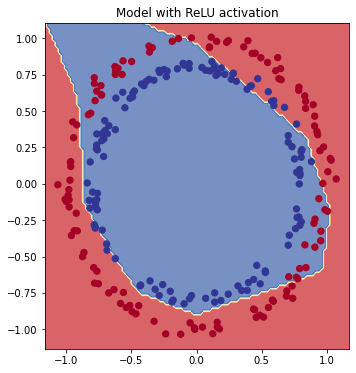

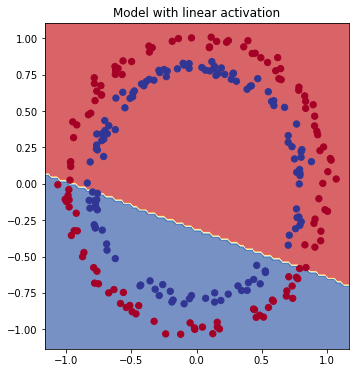

In [63]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Model with ReLU activation')
plot_decision_boundary(model_3,X_test,y_test)

plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title('Model with linear activation')
plot_decision_boundary(model_1,X_test,y_test)


With ReLU activation the decision boundary has improved, the model is able to learn the circular pattern in data.

ReLU - rectified Linear Unit - produces output zero for all negative inputs and a linear ouput for non negative inputs

### 7. Replicating non Linear activation function

In [64]:
# creating a linear dataset

a = torch.arange(-10,10,1,dtype=torch.float32)

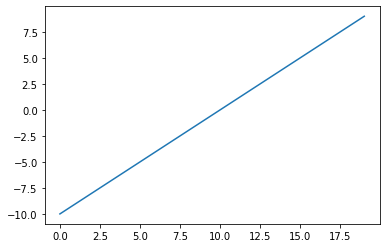

In [65]:
plt.plot(a)

In [66]:
def relu_fn(x):
  return torch.maximum(torch.tensor(0),x)  #return zero if negative, and the number if potive
#computes  element wise maximum of input and other (input,other)

In [67]:
relu_fn(a)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

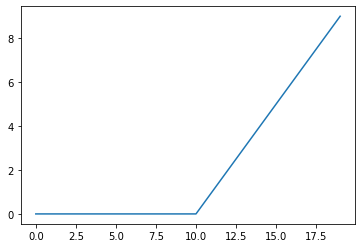

In [68]:
plt.plot(relu_fn(a))

In [69]:
def sigmoid_fn(x):
  return 1/(1+torch.exp(-x))

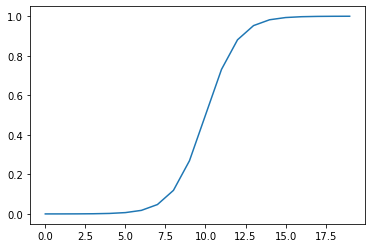

In [70]:
plt.plot(sigmoid_fn(a))

### 8. Putting everything together to build a multi label classification model

#### 8.1 Creating a dataset

In [71]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [72]:
from torch.cuda import is_available
#device agnostic code

if torch.cuda.is_available():
  device = 'cuda'

else:
  device = 'cpu'

device


'cpu'

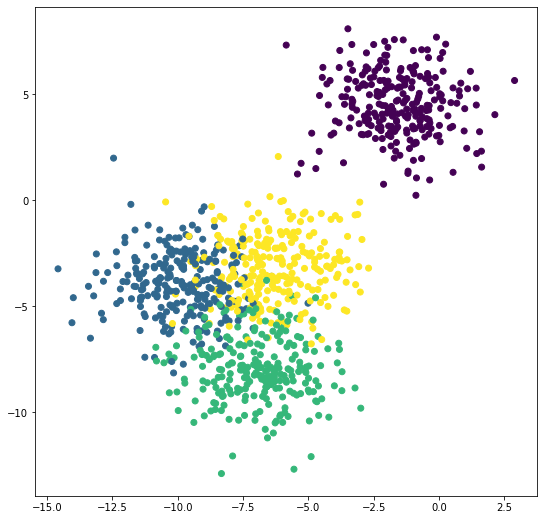

In [73]:
NUM_FEATURES = 2
NUM_CLASSES =4


#1. creating multi class data
X,y = make_blobs(n_samples = 1000,  #number of samples
                 n_features = NUM_FEATURES,    #number of features of each sample,X_features
                 centers =NUM_CLASSES,        #y
                 cluster_std = 1.5, #standard deviation of clusters
                 random_state=RANDOM_STATE)


#2. convert to tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)


#3. splt into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=RANDOM_STATE)


#4.plotting the data
plt.figure(figsize=(9,9))
plt.scatter(X[:,0],X[:,1],c=y)



In [74]:
X_train.shape, y_train.shape, X_test.shape

(torch.Size([750, 2]), torch.Size([750]), torch.Size([250, 2]))

In [75]:
X.shape

torch.Size([1000, 2])

In [76]:
y.shape

torch.Size([1000])

#### 8.2 Creating model, 

In [77]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = input_features, out_features = hidden_units)
    self.layer_2 = nn.Linear(in_features=hidden_units, out_features = output_features)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))


model_4 = BlobModel(input_features = NUM_FEATURES,output_features= NUM_CLASSES,hidden_units=8).to(device)

model_4

BlobModel(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=4, bias=True)
)

#### sneek peak to what our model ouput

In [78]:
### OUR model GIVES LOGITS AS OUTPUT-

### LOGITS are converted to PROabilities by SOFTAMX function
### FOR EACH OBSERVATION THERE ARE 4 PROABILITES ,ALL ADD TO 1 - THESE ARE PROBABILITES FOR EACH CLASS
### THE INDEX OF HIGHEST PROBABILTY GIVES THE CLASS TO WHICH IT BELONGS

y_logits= model_4(X_train) #

y_pred_prob = torch.softmax(y_logits,dim=1)

In [79]:
y_pred_prob[0]  # 

tensor([0.5962, 0.0038, 0.3858, 0.0142], grad_fn=<SelectBackward0>)

In [80]:
torch.sum(y_pred_prob[3])

tensor(1., grad_fn=<SumBackward0>)

In [81]:
torch.argmax(y_pred_prob[5]) #so this is giving the index of the highest probabilty at observation at index 5

tensor(0)

#### 8.3 Creating loss and optimizer

In [82]:
loss_fn = nn.CrossEntropyLoss()

optimizer  = torch.optim.SGD(model_4.parameters(),lr=0.1)

#### 8.4 Creating training and testing loops

In [83]:
#put data to device
X_train,X_test,y_train,y_test =X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

In [84]:
X_train.dtype,X_test.dtype,y_train.dtype,y_test.dtype

(torch.float32, torch.float32, torch.int64, torch.int64)

In [85]:

epochs = 100

for epoch in range(epochs):
  #train mode
  model_4.train()
  #forward pass
  y_logits = model_4(X_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
  #loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)
  #zero grad
  optimizer.zero_grad()
  #loss backward
  loss.backward()
  #forward step
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)

  if epoch%10==0:
    print(f"Loss:{loss:.4f} Accuracy:{acc:.4f}  |  Test loss:{test_loss:.4f} Test accuracy:{test_acc:.4}")







Loss:2.2658 Accuracy:42.9333  |  Test loss:1.3276 Test accuracy:37.6
Loss:0.6185 Accuracy:70.8000  |  Test loss:0.5605 Test accuracy:76.4
Loss:0.5406 Accuracy:74.1333  |  Test loss:0.4864 Test accuracy:78.0
Loss:0.5108 Accuracy:76.1333  |  Test loss:0.4565 Test accuracy:78.4
Loss:0.4937 Accuracy:78.0000  |  Test loss:0.4393 Test accuracy:80.4
Loss:0.4816 Accuracy:79.0667  |  Test loss:0.4273 Test accuracy:80.8
Loss:0.4718 Accuracy:79.6000  |  Test loss:0.4180 Test accuracy:82.0
Loss:0.4633 Accuracy:79.8667  |  Test loss:0.4102 Test accuracy:82.8
Loss:0.4557 Accuracy:80.8000  |  Test loss:0.4033 Test accuracy:84.4
Loss:0.4485 Accuracy:81.4667  |  Test loss:0.3971 Test accuracy:85.6


#### Visualizing the prediction

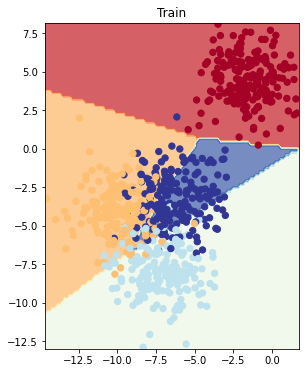

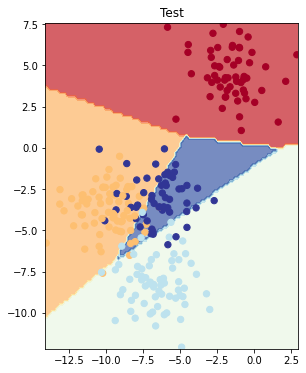

In [87]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4,X_train,y_train)


plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4,X_test,y_test)